In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
#list of useful imports that  I will use
%matplotlib inline
import os
import matplotlib.pyplot as plt
import pandas as pd
import cv2
import numpy as np
from glob import glob
import seaborn as sns
import glob
import os
import zipfile

zip_files = glob.glob('/content/drive/My Drive/Colab Notebooks/*.zip')

for zip_filename in zip_files:
    dir_name = os.path.splitext(zip_filename)[0]
    if not os.path.exists(dir_name):
        os.mkdir(dir_name)
        zip_handler = zipfile.ZipFile(zip_filename, "r")
        zip_handler.extractall(dir_name)
    else:
        print("you have already  extracted",dir_name)
#use this 
if len(glob.glob("/content/train/*"))>0:
  print("All files are already extracted in /content/train ")
else:
  %rm -rf /content/train
  !unzip "/content/drive/My Drive/Colab Notebooks/train.zip" -d "/content/train"

you have already  extracted /content/drive/My Drive/Colab Notebooks/train
you have already  extracted /content/drive/My Drive/Colab Notebooks/test


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


Archive:  /content/drive/My Drive/Colab Notebooks/train.zip
  inflating: /content/train/Black-grass/0050f38b3.png  
  inflating: /content/train/Black-grass/0183fdf68.png  
  inflating: /content/train/Black-grass/0260cffa8.png  
  inflating: /content/train/Black-grass/05eedce4d.png  
  inflating: /content/train/Black-grass/075d004bc.png  
  inflating: /content/train/Black-grass/078eae073.png  
  inflating: /content/train/Black-grass/082314602.png  
  inflating: /content/train/Black-grass/0ace21089.png  
  inflating: /content/train/Black-grass/0b228a6b8.png  
  inflating: /content/train/Black-grass/0b3e7a7a9.png  
  inflating: /content/train/Black-grass/0bb75ded8.png  
  inflating: /content/train/Black-grass/0be707615.png  
  inflating: /content/train/Black-grass/0c67c3fc3.png  
  inflating: /content/train/Black-grass/0d1a9985f.png  
  inflating: /content/train/Black-grass/0d28c429b.png  
  inflating: /content/train/Black-grass/0d4f74f4a.png  
  inflating: /content/train/Black-grass/0dad

In [3]:

#save the path into variable to use it easily next times.
TRAin_DATA_FOLDER= "/content/train"

In [4]:

images = []
classes=[]
missing=0
import glob
import os
for class_folder_name in os.listdir(TRAin_DATA_FOLDER):
    class_folder_path = os.path.join(TRAin_DATA_FOLDER, class_folder_name)
    class_label = class_folder_name
    
    for image_path in glob.glob(os.path.join(class_folder_path, "*.png")):
        image_bgr = cv2.imread(image_path, cv2.IMREAD_COLOR)
        if image_bgr is None: # if the file contain any missig value ignore it
          missing += 1
          continue
        images.append(image_bgr)
        
        classes.append(class_label)
print("totalnumber of images",len(images))
print("totalnumber of classes",len(classes))
#RESIZE IMAGES 

def resize_images(img):

  img = np.array(img).astype(np.uint8)
  #print(img.dtype)
  res = cv2.resize(img,(256,256), interpolation = cv2.INTER_CUBIC)
  return res

#save resized images into images.
images = [resize_images(img) for img in images]

#number of images in each class
#see number of images in each lablel
images = np.array(images)
classes = np.array(classes)
print("images shape: ", images.shape)
print("classes shape: ", classes.shape)
#for key,value in images_per_class.items():
   # print("number of {0} images is  -> {1}".format(key, len(value)))
  
for label in set(classes):

  print("number of {} images is  -> {}".format(
        label, 
        len(images[classes == label])))

totalnumber of images 4750
totalnumber of classes 4750
images shape:  (4750, 256, 256, 3)
classes shape:  (4750,)
number of Loose Silky-bent images is  -> 654
number of Cleavers images is  -> 287
number of Charlock images is  -> 390
number of Shepherds Purse images is  -> 231
number of Common wheat images is  -> 221
number of Black-grass images is  -> 263
number of Sugar beet images is  -> 385
number of Small-flowered Cranesbill images is  -> 496
number of Scentless Mayweed images is  -> 516
number of Maize images is  -> 221
number of Fat Hen images is  -> 475
number of Common Chickweed images is  -> 611


Text(0.5, 0.98, 'Categorical Plotting')

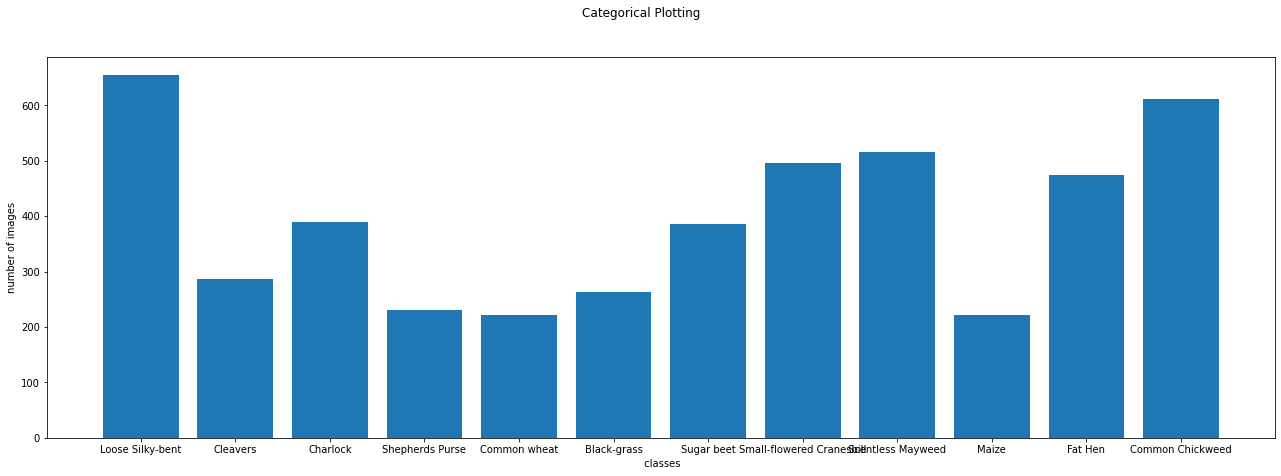

In [5]:
values =[]
labels=[]
for label in set(classes):
  values.append(len(images[classes == label]))
  labels.append(label)

fig, ax = plt.subplots(figsize=(22,7))
ax.bar(labels, values)
ax.set_xlabel(" classes")
ax.set_ylabel("number of images")
#axs[1].scatter(label, )
  #axs[2].plot(names, values)
fig.suptitle('Categorical Plotting')

In [6]:
#MASKING 

def create_mask_for_plant(image):
    image_hsv = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)

    sensitivity = 35
    lower_hsv = np.array([60 - sensitivity, 100, 50])
    upper_hsv = np.array([60 + sensitivity, 255, 255])

    mask = cv2.inRange(image_hsv, lower_hsv, upper_hsv)
    kernel = cv2.getStructuringElement(cv2.MORPH_ELLIPSE, (11,11))
    mask = cv2.morphologyEx(mask, cv2.MORPH_CLOSE, kernel)
    
    return mask

def segment_plant(image):
    mask = create_mask_for_plant(image)
    output = cv2.bitwise_and(image, image, mask = mask)
    return output

def sharpen_image(image):
    image_blurred = cv2.GaussianBlur(image, (0, 0), 3)
    image_sharp = cv2.addWeighted(image, 1.5, image_blurred, -0.5, 0)
    return image_sharp

#put all together 
def segment(img):

  #image_mask = create_mask_for_plant(img)
  image_segmented = segment_plant(img)
  image_sharpen = sharpen_image(image_segmented)
  return image_sharpen
#iterate on all images
for indx, image in enumerate(images):
  try:
     images[indx] = segment(image)
      
  except:
    print(indx)
    continue

In [7]:
#PREPROCESS DATA 
from sklearn.preprocessing import LabelBinarizer
enc = LabelBinarizer()
y = enc.fit_transform(classes)
print(y[0])
random_seed = 2
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(images, y, test_size=0.3, random_state=random_seed)
#split test data into 50% test, 50% validation

random_seed = 2
from sklearn.model_selection import train_test_split
X_test, X_val, y_test, Y_val = train_test_split(X_test,y_test, test_size = 0.5, random_state=random_seed)
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_train.shape)
print(y_test.shape)
print(Y_val.shape)

[0 0 0 0 0 0 0 0 0 1 0 0]
(3325, 256, 256, 3)
(712, 256, 256, 3)
(713, 256, 256, 3)
(3325, 12)
(712, 12)
(713, 12)


In [8]:
#RUN THIS DURING RESNET TRAINING:
# import tensorflow as tf
# X_train=tf.keras.applications.resnet_v2.preprocess_input(X_train)
# X_test=tf.keras.applications.resnet_v2.preprocess_input(X_test)
# X_val=tf.keras.applications.resnet_v2.preprocess_input(X_val)


In [9]:
#RUN THIS DURING inception RESNET V2 TRAINING:
import tensorflow as tf
X_train=tf.keras.applications.inception_resnet_v2.preprocess_input(X_train)
X_test=tf.keras.applications.inception_resnet_v2.preprocess_input(X_test)
X_val=tf.keras.applications.inception_resnet_v2.preprocess_input(X_val)


In [10]:
# COMMON CODE 
from keras.callbacks import ReduceLROnPlateau

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=3, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)
#DATA GENERATOR 
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # apply ZCA whitening
        rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
        zoom_range = 0.1, # Randomly zoom image 
        width_shift_range=0.1,  # randomly shift images horizontally (fraction of total width)
        height_shift_range=0.1,  # randomly shift images vertically (fraction of total height)
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images


datagen.fit(X_train)
# Recall that our dataset is highly imbalanced. We deal with this
# problem by generating class weights and passing them to the model
# at training time. The model will use the class weights to adjust
# how it trains so that each class is considered equally important to
# get right, even if the actual distribution of images is highly 
# variable.
import os
labels_count = dict()
for img_class in [ic for ic in os.listdir('/content/train/') if ic[0] != '.']:
    labels_count[img_class] = len(os.listdir('/content/train/' + img_class))
total_count = sum(labels_count.values())
class_weights = {cls: total_count / count for cls, count in 
                 enumerate(labels_count.values())}
print(labels_count)
print("Weight of each class is ")
print(class_weights)

{'Shepherds Purse': 231, 'Common Chickweed': 611, 'Common wheat': 221, 'Cleavers': 287, 'Charlock': 390, 'Small-flowered Cranesbill': 496, 'Fat Hen': 475, 'Scentless Mayweed': 516, 'Maize': 221, 'Sugar beet': 385, 'Loose Silky-bent': 654, 'Black-grass': 263}
Weight of each class is 
{0: 20.562770562770563, 1: 7.774140752864157, 2: 21.493212669683256, 3: 16.550522648083625, 4: 12.179487179487179, 5: 9.576612903225806, 6: 10.0, 7: 9.205426356589147, 8: 21.493212669683256, 9: 12.337662337662337, 10: 7.2629969418960245, 11: 18.06083650190114}


# MODEL 5 : PRETRAINED RESNET 

In [11]:
from keras.applications import ResNet50V2
from keras.models import Model
import keras
input_shape=(256,256,3)

resnet_pretrained = ResNet50V2(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = resnet_pretrained.layers[-1].output
output = keras.layers.Flatten()(output)

resnet_pretrained_model = Model(resnet_pretrained.input, output)
resnet_pretrained_model.trainable = False

for layer in resnet_pretrained_model.layers:
    layer.trainable = False

resnet_pretrained_model.summary()


94674944/94668760 [==============================] - 6s 0us/step
Model: "functional_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 130, 130, 64) 0           conv1_conv[0][0]                 
______________________

In [12]:
import pandas as pd
pd.set_option('max_colwidth', -1)

layers = [(layer, layer.name, layer.trainable) for layer in resnet_pretrained_model.layers]
pd.DataFrame(layers, columns=['Layer Type', 'Layer Name', 'Layer Trainable'])

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  


,Layer Type,Layer Name,Layer Trainable
0,<tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7f736e341ac8>,input_1,False
1,<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f733bef3828>,conv1_pad,False
2,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f733bef3a58>,conv1_conv,False
3,<tensorflow.python.keras.layers.convolutional.ZeroPadding2D object at 0x7f733bef3f28>,pool1_pad,False
4,<tensorflow.python.keras.layers.pooling.MaxPooling2D object at 0x7f733b6b4358>,pool1_pool,False
...,...,...,...
186,<tensorflow.python.keras.layers.convolutional.Conv2D object at 0x7f733bf7feb8>,conv5_block3_3_conv,False
187,<tensorflow.python.keras.layers.merge.Add object at 0x7f733d0f6550>,conv5_block3_out,False
188,<tensorflow.python.keras.layers.normalization_v2.BatchNormalization object at 0x7f733d0f57b8>,post_bn,False
189,<tensorflow.python.keras.layers.core.Activation object at 0x7f733d0f5588>,post_relu,False


In [13]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(resnet_pretrained_model)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_1 (Functional)    (None, 131072)            23564800  
_________________________________________________________________
dense (Dense)                (None, 512)               67109376  
_________________________________________________________________
dropout (Dropout)            (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_1 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_2 (Dense)              (None, 12)                1548      
Total params: 90,741,388
Trainable params: 67,176,588
Non-trainable params: 23,564,800
___________________________________

In [14]:
BATCH_SIZE =32
epochs = 15
from keras.callbacks import EarlyStopping
history = model.fit_generator(datagen.flow(X_train,y_train, BATCH_SIZE),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=len(X_train) // BATCH_SIZE
                              ,class_weight=class_weights, 
                              callbacks=[learning_rate_reduction,EarlyStopping(patience=3, restore_best_weights=True)])

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/15
103/103 - 63s - loss: 24.7054 - accuracy: 0.4567 - val_loss: 0.7966 - val_accuracy: 0.7377
Epoch 2/15
103/103 - 60s - loss: 14.5571 - accuracy: 0.6599 - val_loss: 0.6198 - val_accuracy: 0.7882
Epoch 3/15
103/103 - 60s - loss: 11.2939 - accuracy: 0.7361 - val_loss: 0.5643 - val_accuracy: 0.7966
Epoch 4/15
103/103 - 60s - loss: 9.7914 - accuracy: 0.7704 - val_loss: 0.5326 - val_accuracy: 0.8247
Epoch 5/15
103/103 - 60s - loss: 8.3773 - accuracy: 0.8081 - val_loss: 0.5102 - val_accuracy: 0.8247
Epoch 6/15
103/103 - 60s - loss: 7.4965 - accuracy: 0.8266 - val_loss: 0.4323 - val_accuracy: 0.8471
Epoch 7/15
103/103 - 59s - loss: 6.9046 - accuracy: 0.8403 - val_loss: 0.4920 - val_accuracy: 0.8359
Epoch 8/15
103/103 - 60s - loss: 6.3930 - accuracy: 0.8521 - val_loss: 0.4190 - val_accuracy: 0.8597
Epoch 9/15
103/103 - 59s - loss: 5.5986 - accuracy: 0.8676 - val_loss: 0.4327 - val_accuracy: 0.8752
Epoch 10/15


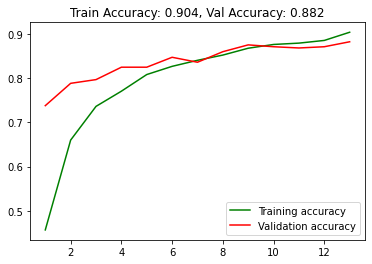

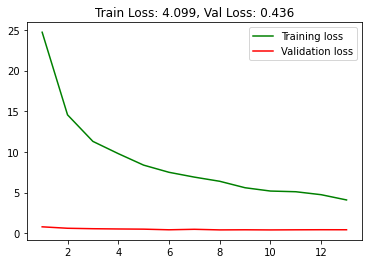

In [15]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()


In [16]:
# MODEL 6 : RESNET  FINE TUNED 

# MODEL 6 : RESNET  FINE TUNED 

In [17]:
from keras.applications import ResNet50V2
from keras.models import Model
import keras
input_shape=(256,256,3)

resnet_finetuned = ResNet50V2(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = resnet_finetuned.layers[-1].output
output = keras.layers.Flatten()(output)

resnet_finetuned_model = Model(resnet_finetuned.input, output)
# METHOD  1
# resnet_finetuned_model.trainable = True

# set_trainable = False
# for layer in resnet_finetuned_model.layers:
#     if layer.name in ['conv5_block3_1_conv ', 'conv5_block3_out']:
#         set_trainable = True
#     if set_trainable:
#         layer.trainable = True
#     else:
#         layer.trainable = False

# METHOD 2
resnet_finetuned_model.trainable = True
for layer in resnet_finetuned_model.layers[:165]:
   layer.trainable = False
for layer in resnet_finetuned_model.layers[165:]:
   layer.trainable = True


resnet_finetuned_model.summary()

Model: "functional_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 262, 262, 3)  0           input_2[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 128, 128, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 130, 130, 64) 0           conv1_conv[0][0]                 
_______________________________________________________________________________________

In [18]:
#please observe that all  layers are traied is false 
for i, layer in enumerate(resnet_finetuned_model.layers):
   print(i, layer.name, layer.trainable)
   

0 input_2 False
1 conv1_pad False
2 conv1_conv False
3 pool1_pad False
4 pool1_pool False
5 conv2_block1_preact_bn False
6 conv2_block1_preact_relu False
7 conv2_block1_1_conv False
8 conv2_block1_1_bn False
9 conv2_block1_1_relu False
10 conv2_block1_2_pad False
11 conv2_block1_2_conv False
12 conv2_block1_2_bn False
13 conv2_block1_2_relu False
14 conv2_block1_0_conv False
15 conv2_block1_3_conv False
16 conv2_block1_out False
17 conv2_block2_preact_bn False
18 conv2_block2_preact_relu False
19 conv2_block2_1_conv False
20 conv2_block2_1_bn False
21 conv2_block2_1_relu False
22 conv2_block2_2_pad False
23 conv2_block2_2_conv False
24 conv2_block2_2_bn False
25 conv2_block2_2_relu False
26 conv2_block2_3_conv False
27 conv2_block2_out False
28 conv2_block3_preact_bn False
29 conv2_block3_preact_relu False
30 conv2_block3_1_conv False
31 conv2_block3_1_bn False
32 conv2_block3_1_relu False
33 conv2_block3_2_pad False
34 conv2_block3_2_conv False
35 conv2_block3_2_bn False
36 conv2_bloc

In [19]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(resnet_finetuned_model)
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_3 (Functional)    (None, 131072)            23564800  
_________________________________________________________________
dense_3 (Dense)              (None, 512)               67109376  
_________________________________________________________________
dropout_2 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 128)               65664     
_________________________________________________________________
dropout_3 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 12)                1548      
Total params: 90,741,388
Trainable params: 76,109,964
Non-trainable params: 14,631,424
_________________________________

In [20]:
BATCH_SIZE =32
epochs = 15
history = model.fit_generator(datagen.flow(X_train,y_train, BATCH_SIZE),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=len(X_train) // BATCH_SIZE
                              ,class_weight=class_weights, 
                              callbacks=[learning_rate_reduction,EarlyStopping(patience=3, restore_best_weights=True)])

Epoch 1/15
103/103 - 63s - loss: 27.4747 - accuracy: 0.4087 - val_loss: 0.8509 - val_accuracy: 0.7307
Epoch 2/15
103/103 - 62s - loss: 14.8251 - accuracy: 0.6568 - val_loss: 0.6509 - val_accuracy: 0.7840
Epoch 3/15
103/103 - 62s - loss: 10.6522 - accuracy: 0.7650 - val_loss: 0.5223 - val_accuracy: 0.8149
Epoch 4/15
103/103 - 62s - loss: 8.1890 - accuracy: 0.8135 - val_loss: 0.4492 - val_accuracy: 0.8555
Epoch 5/15
103/103 - 62s - loss: 6.4694 - accuracy: 0.8451 - val_loss: 0.4314 - val_accuracy: 0.8696
Epoch 6/15
103/103 - 61s - loss: 5.8522 - accuracy: 0.8694 - val_loss: 0.4426 - val_accuracy: 0.8555
Epoch 7/15
103/103 - 62s - loss: 4.8275 - accuracy: 0.8816 - val_loss: 0.4489 - val_accuracy: 0.8668
Epoch 8/15

Epoch 00008: ReduceLROnPlateau reducing learning rate to 1e-05.
103/103 - 62s - loss: 4.1786 - accuracy: 0.9062 - val_loss: 0.4539 - val_accuracy: 0.8597


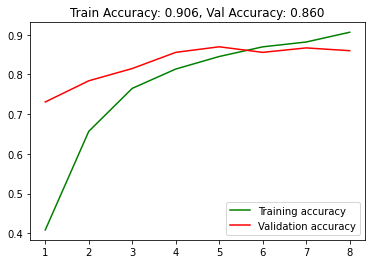

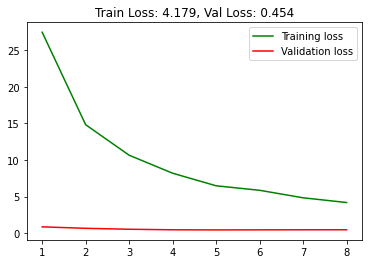

In [21]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()


# MODEL 7 :  pre trained InceptionResNetV2

In [22]:
#lets add global avarage before flatten so that it will reduce number of parameter 
from keras.applications import InceptionResNetV2
from keras.models import Model
import keras
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
input_shape=(256,256,3)

inception_resnet_pretrained = InceptionResNetV2(include_top=False, weights='imagenet', 
                                     input_shape=input_shape)

output = inception_resnet_pretrained.layers[-1].output
# WAY 1
output = keras.layers.Flatten()(output)
# WAY 2 :
#output = keras.layers.GlobalAveragePooling2D()(output)

inception_resnet_pretrained_model = Model(inception_resnet_pretrained.input, output)
inception_resnet_pretrained_model.trainable = False

for layer in inception_resnet_pretrained_model.layers:
    layer.trainable = False

inception_resnet_pretrained_model.summary()



219062272/219055592 [==============================] - 8s 0us/step
Model: "functional_5"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_3 (InputLayer)            [(None, 256, 256, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 127, 127, 32) 864         input_3[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 127, 127, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 127, 127, 32) 0           batch_normalization[0][0]        
____________________

In [23]:
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, InputLayer
from keras.models import Sequential
from keras import optimizers

model = Sequential()
model.add(inception_resnet_pretrained_model)
# model.add(Dense(512, activation='relu'))
# model.add(Dropout(0.3))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(12, activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
functional_5 (Functional)    (None, 55296)             54336736  
_________________________________________________________________
dense_6 (Dense)              (None, 128)               7078016   
_________________________________________________________________
dropout_4 (Dropout)          (None, 128)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 12)                1548      
Total params: 61,416,300
Trainable params: 7,079,564
Non-trainable params: 54,336,736
_________________________________________________________________


In [24]:
BATCH_SIZE =32
epochs = 15
from keras.callbacks import EarlyStopping
history = model.fit_generator(datagen.flow(X_train,y_train, BATCH_SIZE),
                              epochs = epochs, validation_data = (X_val,Y_val),
                              verbose = 2, steps_per_epoch=len(X_train) // BATCH_SIZE
                              ,class_weight=class_weights, 
                              callbacks=[learning_rate_reduction,EarlyStopping(patience=3, restore_best_weights=True)])

Epoch 1/15
103/103 - 79s - loss: 25.4050 - accuracy: 0.3787 - val_loss: 1.2192 - val_accuracy: 0.6213
Epoch 2/15
103/103 - 73s - loss: 16.2310 - accuracy: 0.6001 - val_loss: 0.9221 - val_accuracy: 0.6732
Epoch 3/15
103/103 - 73s - loss: 13.3016 - accuracy: 0.6650 - val_loss: 0.7882 - val_accuracy: 0.7279
Epoch 4/15
103/103 - 74s - loss: 10.9477 - accuracy: 0.7319 - val_loss: 0.7057 - val_accuracy: 0.7602
Epoch 5/15
103/103 - 74s - loss: 9.8184 - accuracy: 0.7580 - val_loss: 0.6034 - val_accuracy: 0.7896
Epoch 6/15
103/103 - 73s - loss: 8.7088 - accuracy: 0.7795 - val_loss: 0.6008 - val_accuracy: 0.7756
Epoch 7/15
103/103 - 73s - loss: 7.7289 - accuracy: 0.8087 - val_loss: 0.5296 - val_accuracy: 0.8065
Epoch 8/15
103/103 - 73s - loss: 7.2860 - accuracy: 0.8169 - val_loss: 0.5355 - val_accuracy: 0.8008
Epoch 9/15
103/103 - 73s - loss: 6.5903 - accuracy: 0.8284 - val_loss: 0.4787 - val_accuracy: 0.8373
Epoch 10/15
103/103 - 73s - loss: 6.2607 - accuracy: 0.8454 - val_loss: 0.4511 - val_ac

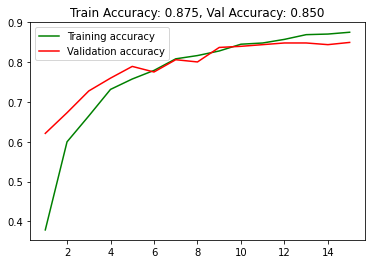

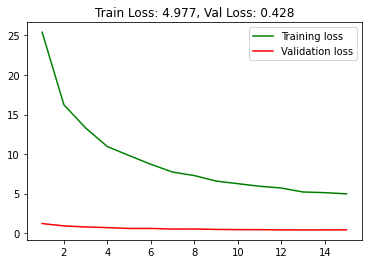

In [25]:
import matplotlib.pyplot as plt

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(1, len(acc)+1)

plt.plot(epochs, acc, 'g', label='Training accuracy')
plt.plot(epochs, val_acc, 'r', label='Validation accuracy')
plt.title('Train Accuracy: %.3f, Val Accuracy: %.3f' % (acc[-1], val_acc[-1]), fontsize=12)
plt.legend()

plt.figure()

plt.plot(epochs, loss, 'g', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Train Loss: %.3f, Val Loss: %.3f' % (loss[-1], val_loss[-1]), fontsize=12)
plt.legend()

plt.show()
